<a href="https://colab.research.google.com/github/brownr16/electromagnetics_modelling/blob/main/MagneticCircuit_airgap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Magnetic Circuit with Air Gap</h1></b>

Dr. Bingsen Wang

4/30/2023
</center>

#Operating Point of Magnetic Circuit with Air Gap



##Operating Point Based on $B$ and $H$

With an air gap, the magnetic field intensity inside the core and the air gap are $H_c$ and $H_g$, respectively. Based on Ampere's law, the following holds
$$H_cl_c + H_gl_g = Ni\tag{1}$$
where N is the number of turns of the winding; $l_c$ is the length of the flux path inside the magnetic core;  $l_g$ is the length of the air gap.

Due to the continuity of magnetic flux, we have
$$B_cA_c = B_gA_g\tag{2}$$
where $A_c$ is the cross sectional area of the magnetic core; $B_c$ is the flux density inside the magnetic core; $A_g$ is the cross sectional area of the  air gap; $B_g$ is the flux density inside the air gap.

If the cross sectional areas of the core and the air gap are equal, then flux density inside the air gap will be equal to the one inside the magentic core, i.e.
$$B_g = B_c = B \tag{3}$$





Inside the air gap, we have
$$  H_g = {B\over\mu_0} \tag{4}$$
where $\mu_0$ is the permeability of the air. 

Substituting (4) in (1) yields
$$H_cl_c + {B\over\mu_0}l_g = Ni\tag{5}$$
Alternatively, (5) can be rewritten as
$$B = -\frac{\mu_0l_c}{l_g}H_c + \frac{\mu_0Ni}{l_g}\tag{6}$$
The intersection of straight line represented by (6) and the B-H curve of the magnetic material determins the operating point. If the magnetic curve is linear, i.e.
$$H_c= {B\over\mu}\tag{7}$$
Substituting (7) in (6) yields
$$B = \frac{\mu_0\over l_g}{1+ \frac{\mu_0l_c}{\mu l_g}} Ni = \frac{1}{\frac{l_g}{\mu_0}+ \frac{l_c}{\mu}} Ni\tag{8}$$


##Operating Point Based on $\phi$ and $\cal F$

With an air gap, the magnetomotive force (mmf) across the core and the air gap are $\cal F_c$ and $\cal F_g$, respectively. Based on Ampere's law, the following holds
$${\cal F}_c + {\cal F}_g = Ni\tag{9}$$
Let $\phi$ be the flux that is the same inside the core or the air gap. Then
$${\cal F}_g = \phi {\cal R}_g\tag{10}$$
where $\cal R_g$ is the reluctance of the air gap determined by
${\cal R}_g = \frac{l_g}{\mu_0 A_c}$

Substituting (10) in (9) yields
$$\phi = -{1\over\cal R_g}{\cal F_c} +\frac{Ni}{\cal R_g}\tag{11}$$

The intersection of the straight line represented by (11) and the $\phi$-$\cal F$ curve of the magnetic material determines the operating point.
If the magnetic curve is linear, i.e.
$${\cal F}_c = \phi {\cal R_c}\tag{12}$$
Substituting (12) in (11) yields
$$\phi = \frac{Ni}{{\cal R}_g\left(1+\frac{\cal R_c}{\cal R_g}\right)} =\frac{Ni}{\cal R_g + \cal R_c} \tag{13}$$



##Operating Point Based on $\lambda$ and $i$

With an air gap, the magnetizing current for the core and the air gap are $\cal i_c$ and $\cal i_g$, respectively. Then we have
$$i_c + i_g=i \tag{14}$$

Let $L_g = {N^2\over {\cal R}_g}$ be the inductance associated with the air gap alone, then 
$$i_g = {\lambda\over L_g}\tag{15}$$
Substituting (15) in (14) yields
$$\lambda = -L_g i_c + L_gi \tag{16}$$
The intersection of the straight line represented by (16) and the $\lambda-i_c$ curve determines the operating point. If the inductance is linear, i.e.
$$i_c = {\lambda \over L_c} \tag{17}$$
Substituting (17) in (16) yields
$$\lambda = \frac{L_g i}{1+{L_g\over L_c}} = \frac{1}{{1\over L_g}+ {1\over L_c}}i \tag{18}$$

#$\lambda-i$ Curve as an Example

Let the $\lambda-i$ curve of the magnetic core without air gap be modeled by
$$\lambda = L\tanh(i_c)\tag{19}$$
where $L=\frac{N^2\mu A_c}{l_c}$ with $\mu$ being the permeability before saturation. 
With air-gap, the additional equation as in (16) has to be satisfied. Substituting (16) in (19) yields
$$i_c +\frac{L}{L_g}\tanh(i_c) = i \tag{20}$$
Since $L_g = \frac{N^2\mu_0 A_c}{l_g}$, (20) can be rewritten as
$$i_c +\mu_r\frac{l_g}{l_c}\tanh(i_c) = i \tag{21}$$

For each given $i$, $i_c$ can be solved from (20) or (21). Then the result of $i_c$ is used to determine $\lambda$ in (19). Thus, the plot of $\lambda-i$ curve is obtained.

#Python Code
The Python code illustrate the $\lambda-i$ curves for different air-gap lengths.

<ipython-input-40-2c16b606d979>:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


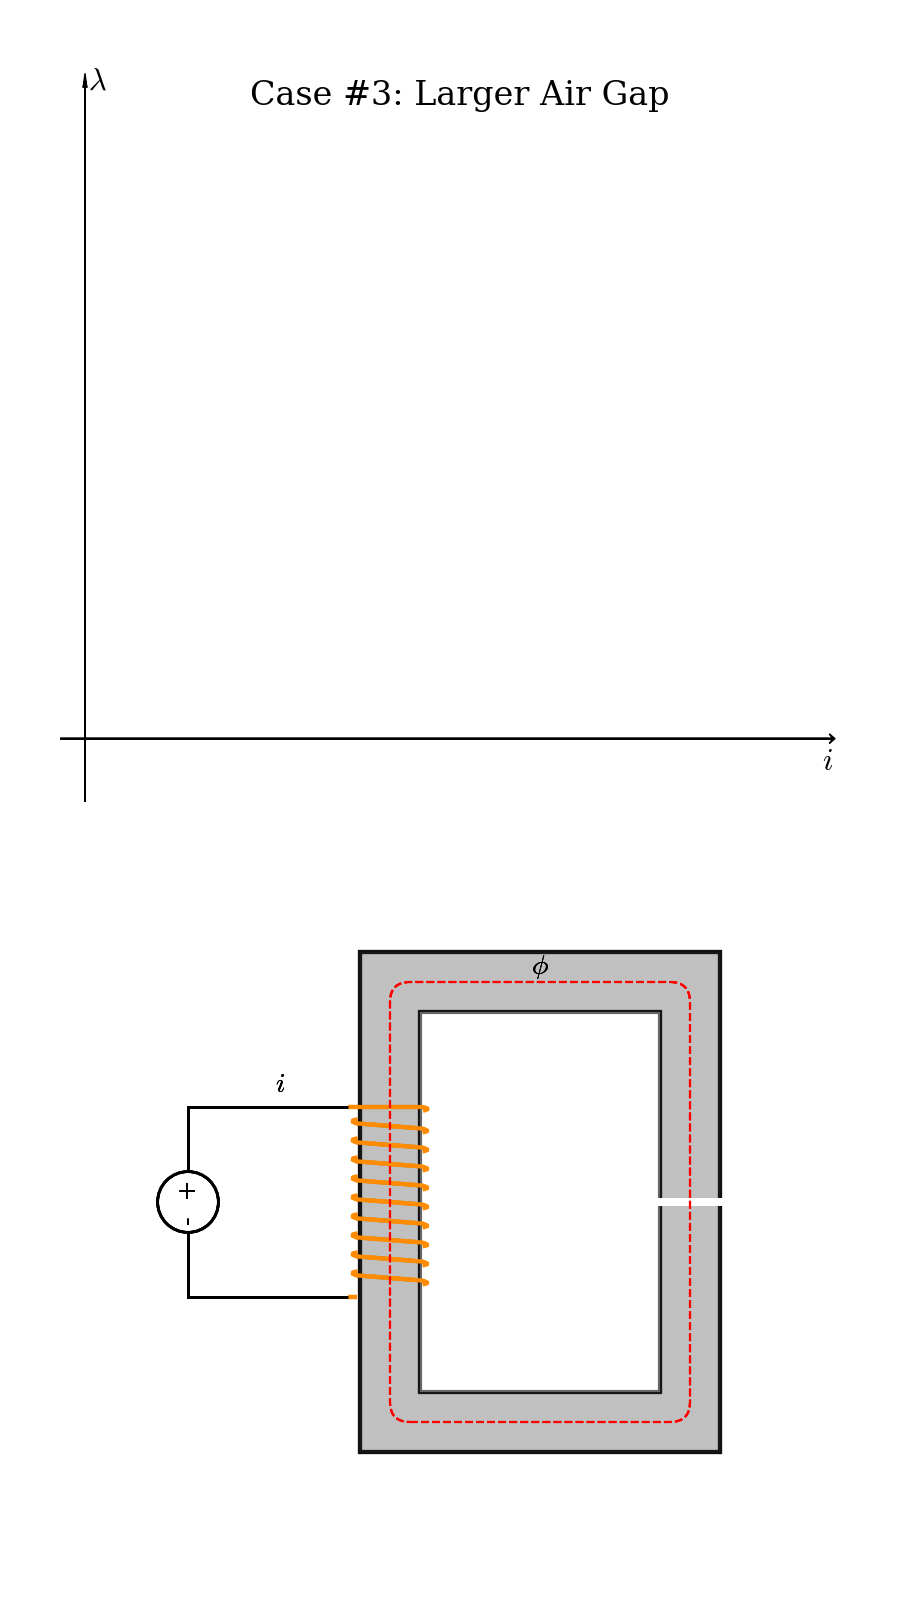

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from scipy.optimize import fsolve
from numpy import linspace,cos,sin,pi,exp,heaviside,angle,sqrt,tanh,arctanh,arctan
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba,to_rgb
from matplotlib.text import TextPath
from matplotlib.path import Path
import matplotlib.patches as mp
#  import PathPatch,Arrow,Circle,Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#draw coil
def drawCoil(ax,x0,y0,w,l,n,clr,lw,dir):
  """
  x0,y0: lower left corner of the coil
  w: width of the core that the coil is wound around
  l: length
  n: number of turns
  cl: color
  dir: 1 for right-hand up or left; 0 for opposite direction
  """
  dbt = l/n #distance between turns
  if dir==0:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0+w*1.05,y0),(x0+w*1.2,y0+dbt*0.1),(x0+w*1.05,y0+dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0-w*.05,y0+l)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k-0.2)),
              (x0-w*.2,y0+dbt*(k-0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k+0.1)),
              (x0+w*1.05,y0+dbt*(k+0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  if dir==1:
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0+l),(x0+w*1.05,y0+l),(x0+w*1.2,y0+l-dbt*0.1),(x0+w*1.05,y0+l-dbt*0.2)],
                                    [Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE3]),
                               color=clr,fc='none',lw=lw)) #first turn
    ax.add_patch(mp.PathPatch(Path([(x0-w*0.2,y0),(x0-w*.05,y0)],
                                    [Path.MOVETO,Path.LINETO]),
                               color=clr,fc='none',lw=lw)) #last turn
    
    for k in range(1,n): #turns other than 1st and last
        vt = [(x0-w*0.05,y0+dbt*(k+0.2)),
              (x0-w*.2,y0+dbt*(k+0.1)),
              (x0-w*0.05,y0+dbt*k),
              (x0+w*1.05,y0+dbt*k),
              (x0+w*1.2,y0+dbt*(k-0.1)),
              (x0+w*1.05,y0+dbt*(k-0.2))]
        codes = [Path.MOVETO,
                 Path.CURVE3,
                 Path.CURVE3,
                 Path.LINETO,
                 Path.CURVE3,
                 Path.CURVE3]
        rot = transforms.Affine2D().rotate_deg_around(x0+w*0.5,y0+dbt*k,-arctan(dbt/w*0.25)*180/pi)+ax.transData
        ax.add_patch(mp.PathPatch(Path(vt,codes), color=clr,fc='none',lw=lw, transform=rot))
  return

#draw magnetic circuit
def drawMagCkt(ax,x0,y0,w,h,c,lg):
  """
  x0,y0: center of the magnetic core
  w: width
  h: hight
  c: cross section
  air-gap length
  """
  wi = w - 2*c #inner width
  hi = h - 2*c #inner hight
  ax.add_patch(mp.Rectangle((x0-0.5*w,y0-0.5*h),w,h,
               ec=to_rgba('k',0.6),fc=to_rgba('grey',0.2),lw=3 )) #outer boundary of core
  ax.add_patch(mp.Rectangle((x0-0.5*wi,y0-0.5*hi),wi,hi,
               ec=to_rgba('k',0.6),fc='w',lw=3 )) #inner boundary of core 
  ax.add_patch(mp.Rectangle((x0+0.5*wi-0.1,y0-0.5*lg),c+0.2,lg,ec='none',fc='w')) #air gap
  drawCoil(ax,x0-w*0.5,y0-0.25*hi,c,0.5*hi,10,'darkorange',3,1)    
  x1=x0-w*0.5-0.2*c
  y1=y0-0.25*hi
  ax.add_patch(mp.PathPatch(Path([(x1,y1),(x1- 0.4,y1),(x1-0.4,y1+0.17*hi),
                               (x1,y1+0.5*hi),(x1- 0.4,y1+0.5*hi),(x1-0.4,y1+0.33*hi)],
                              [Path.MOVETO,Path.LINETO,Path.LINETO,
                               Path.MOVETO,Path.LINETO,Path.LINETO]),
                         lw=2,fc='none'))
  ax.add_patch(mp.Circle((x1-0.4,0),0.08*hi,lw=2,fc='none',ec='k'))
  ax.text(x1-0.395,0,'-  +',va='center', ha='center',rotation='vertical',size=18)
  ax.text(-0.45,.275,r'$i$',size=20,ha='center')
  ax.text(0.2,.57,r'$\phi$',size=20,ha='center')
  ax.add_patch(mp.FancyBboxPatch((x0-0.5*w+0.5*c,y0-0.5*h+0.5*c),w-c,h-c,
                                  boxstyle='round,pad=0,rounding_size=0.05',
                                  fc='none',ec='r',ls='--',lw=1.5,zorder=3)) #flux path
  return

fig = plt.figure(figsize=(9,16))
xylim1 =[3,1.05]
ax1 = fig.add_axes((1/18,0.5 , 8/9, 0.495),xlim=[-0.1,xylim1[0]+0.1], ylim=[-0.1,xylim1[1]+0.1]) # hystersis
xylim2=[9/8,1]
ax2 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
ax3 = fig.add_axes((0.0, 0.0, 1, 0.5), xlim=[-xylim2[0],xylim2[0]], ylim=[-xylim2[1],xylim2[1]]) 
fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

kwargs = {'overhang':0.5,'width':0.002, 'head_width':0.015, 'ec':'k', 'fc':'k', 'length_includes_head':True}
ax1.arrow(-xylim1[0],0,2*xylim1[0],0,**kwargs)
ax1.arrow(0,-xylim1[1],0,2*xylim1[1],**kwargs)
ax1.text(xylim1[0]-0.05,-0.05,r'$i$',size=22)
ax1.text(0.01,xylim1[1]-0.025,r'$\lambda$',size=22)
title_text=ax1.text(1.5,1,"",ha='center',size=24)



x0=0.2
y0=0
w=0.9
h=1.25
c=0.15
Nfpp=150
Nf = 3*Nfpp
mu_r=1000
rlgc = [0,0.002,0.005] #ratio lg/lc
L=1
xm=2.9
x=linspace(0,xm,Nfpp)
lmd_ng = tanh(x) # without air gap
lmd=[] #flux linkage for all air-gap lengths
lmd_appr = [] #linear approximation
lg = []
for k in range(len(rlgc)):
  lg.append(rlgc[k]*(2*(w-c)+2*(h-c)))
  lmd_k=[]
  for ix in x:
    func = lambda ic: ic + mu_r*rlgc[k]*tanh(ic)-ix
    ic_guess=0.5 #initial guess value
    ic_sol =fsolve(func,ic_guess) # using fsolve function to solve ic solution
    lmd_k.append(L*tanh(ic_sol)) #flux linkage for the k-th air gap length
  lmd.append(lmd_k)
  lmd_appr.append(L/(1+mu_r*rlgc[k])*x)

#line for lambda-i curve
line_li, = ax1.plot([], [], color='b', lw=5)

text_list=['Case #1: No Air Gap', 'Case #2: Small Air Gap', 'Case #3: Larger Air Gap']
# animation function.  This is called sequentially
def animate(i):
  k = int(i/Nfpp)
  i=i%Nfpp
  if i==1:
    drawMagCkt(ax2,x0,y0,w,h,c,lg[k])
    title_text.set_text(text_list[k])
  line_li.set_data(x[0:i],lmd[k][0:i])
  ax3.clear()
  ax3.set_xlim(-xylim2[0],xylim2[0])
  ax3.set_ylim(-xylim2[1],xylim2[1])
  ax3.axis('off')
  ax3.add_patch(mp.Arrow(-0.45-x[i]/xm/8,0.26,x[i]/xm/4,0,width=0.05,fc='b')) #current arrow
  ax3.add_patch(mp.Arrow(0.2-lmd[k][i]/8,y0+0.5*h-0.5*c,lmd[k][i]/4,0,width=0.075,fc='b')) #flux arrow
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"MagneticCircuit_AirGap.mp4" 
writervideo = animation.FFMpegWriter(fps=50) 
anim.save(fn, writer=writervideo,dpi = 120)
